# Drunk driving recognition based on Random Forest 

## 1. Random Forest —— sklearn implementation

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

import pydotplus
import os  

In [130]:
# 加载数据
dataPath = '../../data/data_drunkDriving'
resultsPath = '../../results/results_drunkDriving'
df = pd.read_csv(dataPath+'/data.csv')

In [131]:
# 查看数据
df.head()

,Speed,Acceleration,EngineRevolution,Accelerator,Clutch,Brake,Steering,Switches,Gear,WheelSlip,DistanceToCenterOfLane,PX,PY,PZ,category,output
0,22.429807,0.082253,265.046548,0.164597,0.992197,0.003707,-0.032688,0.0,4.0,0.00000,2.660644,1254.288839,4217.311259,-0.01,200Y,1
1,23.883663,-0.668780,282.525833,0.416795,0.995969,0.163153,-0.246761,0.0,4.0,13.72549,3.755827,-4188.509085,5616.163905,0.00,200Y,1
2,19.276503,0.097968,227.774718,0.159092,0.961205,0.000000,-0.028083,0.0,4.0,0.00000,2.251745,1811.828461,5999.674140,-0.01,200Y,1
3,21.014289,-0.057411,171.950735,0.206029,0.999977,0.020285,-0.038532,0.0,5.0,0.00000,2.729846,-4196.767713,5599.723250,0.00,200Y,1
4,22.299331,-0.292891,182.528952,0.255531,0.995539,0.063279,-0.039754,0.0,5.0,0.00000,2.169300,1812.517617,6001.647345,-0.01,200Y,1


In [132]:
# 加载特征和标签
X_name =['Speed','Acceleration','EngineRevolution','Accelerator','Clutch','Brake','Steering','Switches','Gear','WheelSlip','DistanceToCenterOfLane']
# X_name = ['Speed','Acceleration','EngineRevolution','Accelerator','Clutch','Brake','Steering','Gear','DistanceToCenterOfLane']
X = df[X_name]
y_label = ['not drunk','drunk']
y = df['output']

In [133]:
# 划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [134]:
# 训练模型
clf = RandomForestClassifier(n_estimators=100,max_features = len(X_name)).fit(X_train, y_train)

In [135]:
# 测试模型
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.75


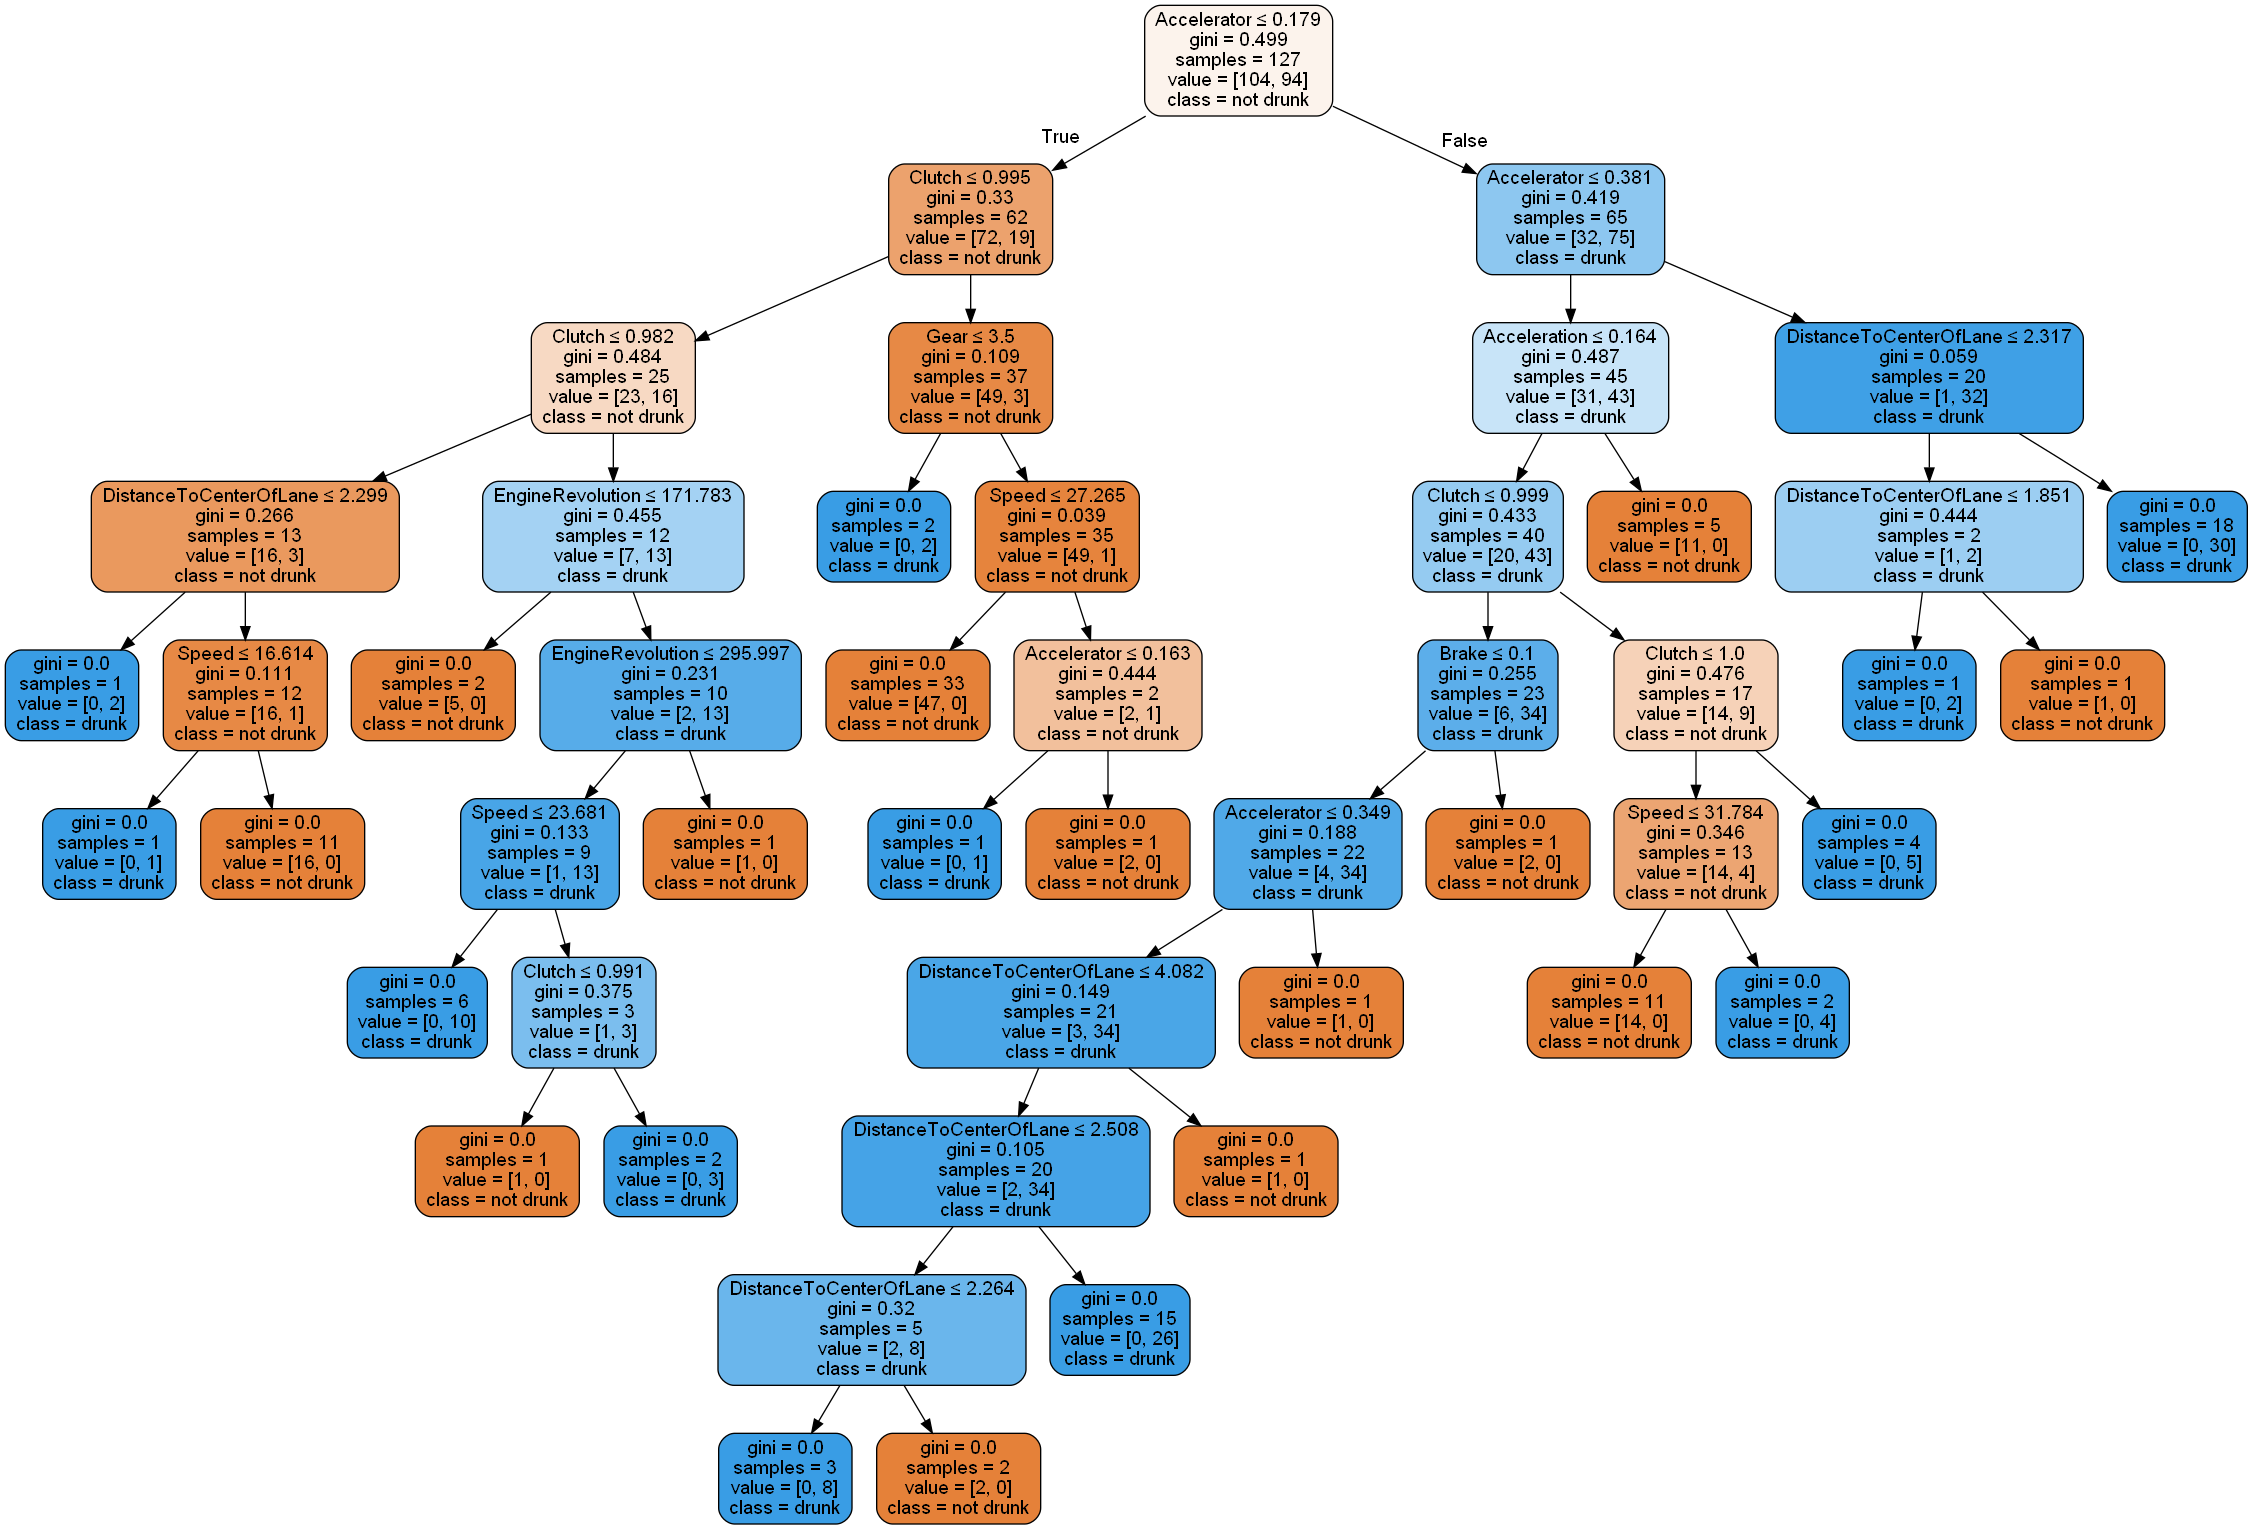

In [136]:
# 绘制树
estimators = clf.estimators_[0:10]
for index, model in enumerate(estimators):
    filename = resultsPath + 'RF_' + str(index) + '.pdf'
    dot_data = export_graphviz(model,
                               out_file=None,
                               feature_names=X_name,
                               class_names=y_label,
                               filled=True,
                               rounded=True,
                               special_characters=True)
    graph = graph_from_dot_data(dot_data)
    # 使用ipython的终端jupyter notebook显示。
    # Image(graph.create_png())
    graph.write_pdf(filename)
Image(graph.create_png())

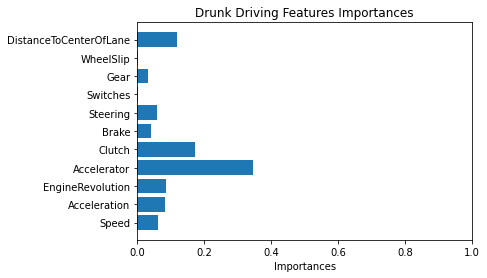

In [137]:
# 决策树特征权重可视化
y_importances = clf.feature_importances_
x_importances = X_name
y_pos = np.arange(len(x_importances))
# 横向柱状图
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances)
plt.xlabel('Importances')
plt.xlim(0, 1)
plt.title('Drunk Driving Features Importances')
plt.show()